In [252]:
from plywood_gallery import ChapterManager
#ChapterManager.clean("Image Options")
ChapterManager.reset_counter()
ChapterManager.set_chapter_name("Image Options")

NapariSettings (defaults excluded)
----------------------------------
appearance:
  layer_tooltip_visibility: true
  theme: light
application:
  first_time: false
  window_position:
  - 800
  - 300
  window_size:
  - 1000
  - 100
  window_state: '!QBYTE_AAAA/wAAAAD9AAAAAgAAAAAAAAECAAACGPwCAAAAAvsAAAAcAGwAYQB5AGUAcgAgAGMAbwBuAHQAcgBvAGwAcwEAAAAAAAACGAAAAUkAAAFJ+wAAABQAbABhAHkAZQByACAAbABpAHMAdAAAAAAAAAACGAAAALcA////AAAAAwAAAAAAAAAA/AEAAAAB+wAAAA4AYwBvAG4AcwBvAGwAZQAAAAAA/////wAAADIA////AAABYgAAAhgAAAAEAAAABAAAAAgAAAAI/AAAAAA='
  window_statusbar: false

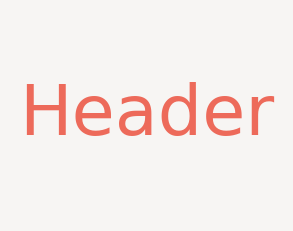

In [253]:
%%capture_png -p Header2.png --celltype Header --style "width:140px"
import matplotlib.pyplot as plt
import napari
import numpy as np
import scipy
from scipy import ndimage as ndi
from skimage import data

from napari.settings import get_settings

get_settings().application.window_position = (800,300)
get_settings().application.window_size = (1000,100)
get_settings().application.window_fullscreen = False
get_settings().application.window_statusbar =  False
get_settings().application.save_window_state =  False

try:
    viewer
except NameError:
    viewer = napari.Viewer()
    viewer.theme = "light"
    viewer.dims.ndisplay = 3

def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash= False)
    plt.imshow(img)
    plt.axis("off")

# make data
blobs = data.binary_blobs(length=301, volume_fraction=0.1, n_dim=3, seed=42)
blobs  = blobs[200:,200:, :-100]
blobs[:,:,:50]=1

import matplotlib.pyplot as plt #NOT
fix, ax = plt.subplots(figsize=(5,4), facecolor="#F7F5F3") #NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A") #NOT
ax.text(0.5, 0.5, "Header",**text_kwargs) #NOT
ax.axis("off"); #NOT

from napari.settings import get_settings
get_settings()

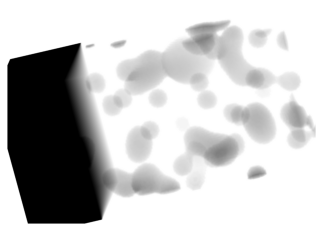

In [254]:
%%capture_png -p FirstView.png --celltype Normal --style "width:200px"
viewer.reset_view()
viewer.layers.clear()
viewer.dims.ndisplay = 3
viewer.theme = "light"
layer1 = viewer.add_image(blobs, colormap='gray_r')
layer1.rendering = "average"
layer1.gamma = 0.9
viewer.camera.angles = (13, 10, 77)
layer1.opacity = 1
make_screenshot(viewer)
# average
# gray_r

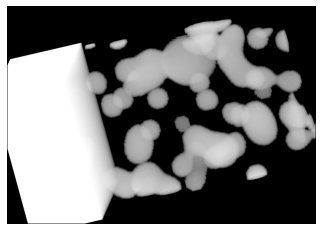

In [255]:
%%capture_png -p Colormapinferno.png --celltype Normal --style "width:200px"
viewer.theme = "dark"
layer1.colormap = "gray"
layer1.gamma = 0.2
make_screenshot(viewer)

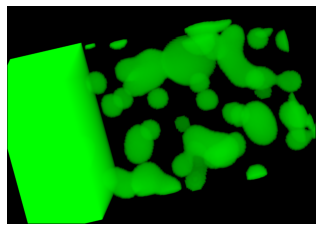

In [256]:
%%capture_png -p ColorGreen.png --celltype Normal --style "width:200px"
layer1.colormap = "green"
layer1.gamma = 0.2
make_screenshot(viewer)



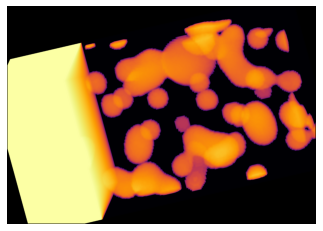

In [257]:
%%capture_png -p Colormapinferno.png --celltype Normal --style "width:200px"
layer1.colormap = "inferno"
layer1.gamma = 0.2 
make_screenshot(viewer) 

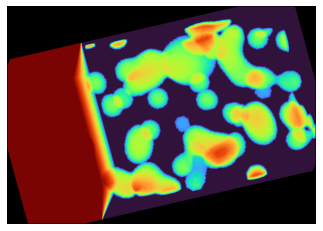

In [258]:
%%capture_png -p Colormapturbocontrast.png --celltype Normal --style "width:200px"
layer1.colormap = "turbo"
layer1.gamma = 0.5
layer1.contrast_limits = [0.0, 0.65]
make_screenshot(viewer) 

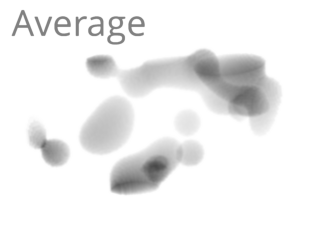

In [259]:
%%capture_png -p BackToBlackGamma1.png --celltype Normal --style "width:200px"
viewer.text_overlay.visible = True
viewer.text_overlay.text = "Average"
viewer.text_overlay.font_size =40
viewer.layers.clear()
viewer.dims.ndisplay = 3
viewer.theme = "light"
layer1 = viewer.add_image(blobs[50:,:,100:], colormap='gray_r')
layer1.rendering = "average"
layer1.gamma = 1
#viewer.camera.angles = (-10, 12, 88)
viewer.camera.angles= (165, -50, -153)
layer1.opacity = 1
make_screenshot(viewer)

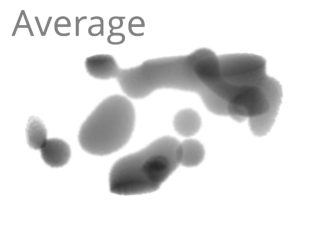

In [260]:
%%capture_png -p BackToBlackGamma0_5.png --celltype Normal --style "width:200px"
layer1.rendering = "average"
layer1.gamma = 0.5
make_screenshot(viewer)

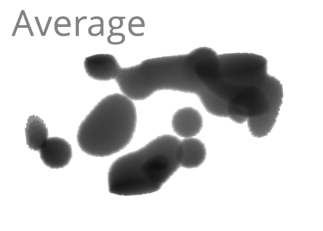

In [261]:
%%capture_png -p BackToBlackGamma0_2.png --celltype Normal --style "width:200px"
layer1.rendering = "average"
layer1.gamma = 0.2
make_screenshot(viewer)

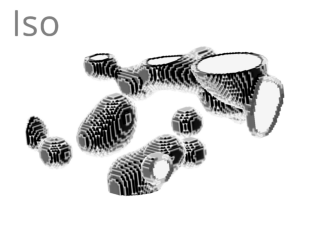

In [262]:
%%capture_png -p iso.png --celltype Normal --style "width:200px"
viewer.text_overlay.text = "Iso"
layer1.rendering = "iso"
layer1.iso_threshold=0
layer1.gamma = 2
make_screenshot(viewer)

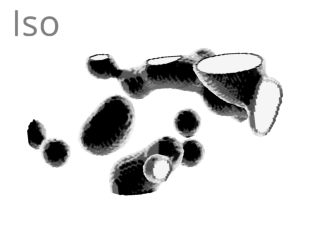

In [263]:
%%capture_png -p iso2.png --celltype Normal --style "width:200px"
viewer.text_overlay.text = "Iso"
layer1.rendering = "iso"
layer1.iso_threshold=0.5
layer1.gamma = 2
make_screenshot(viewer)

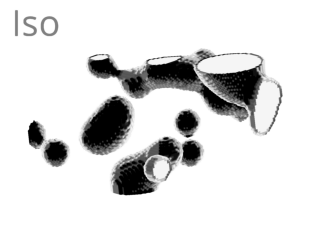

In [264]:
%%capture_png -p iso2.png --celltype Normal --style "width:200px"
viewer.text_overlay.text = "Iso"
layer1.rendering = "iso"
layer1.iso_threshold= 0.8
layer1.gamma = 2
make_screenshot(viewer)

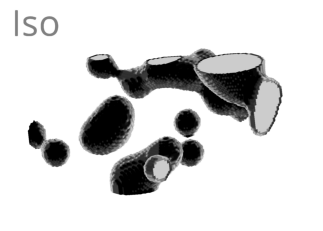

In [265]:
%%capture_png -p iso2.png --celltype Normal --style "width:200px"
viewer.text_overlay.text = "Iso"
layer1.rendering = "iso"
layer1.iso_threshold= 0.8
layer1.gamma = 1
make_screenshot(viewer)

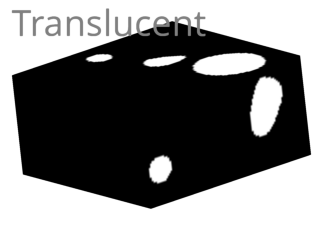

In [266]:
%%capture_png -p trans.png --celltype Normal --style "width:200px"
viewer.text_overlay.text = "Translucent" # see the surface
layer1.rendering = "translucent"
layer1.colormap ="gray"
make_screenshot(viewer)

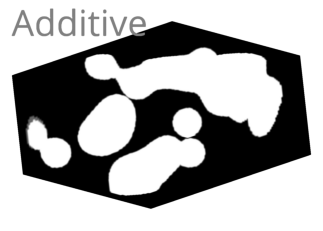

In [267]:
%%capture_png -p additive.png --celltype Normal --style "width:200px"
viewer.text_overlay.text = "Additive"
layer1.rendering = "additive"
layer1.colormap ="gray"
make_screenshot(viewer)

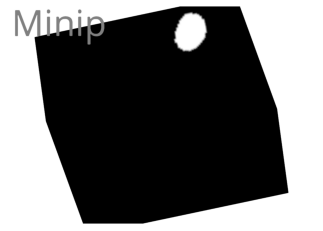

In [268]:
%%capture_png -p Minip.png --celltype Normal --style "width:200px"
viewer.text_overlay.text = "Minip" # find holes
viewer.camera.angles = (-70, -54, 80)
layer1.rendering = "minip"
layer1.colormap ="gray"
make_screenshot(viewer)

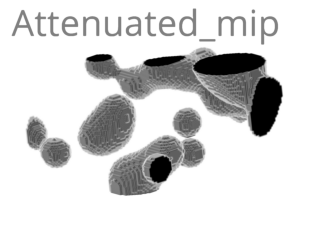

In [269]:
%%capture_png -p attenuated_mip_0_5.png --celltype Normal --style "width:200px"
viewer.text_overlay.text = "mip"
layer1.rendering = "attenuated_mip"
layer1.attenuation=0.5
layer1.gamma = 2
layer1.colormap ="gray_r"
viewer.camera.angles= (165, -50, -153)
make_screenshot(viewer)

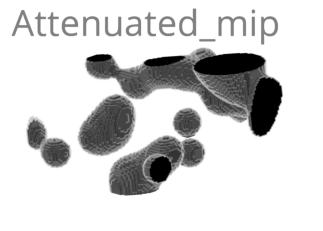

In [270]:
%%capture_png -p attenuated_mip_0_2.png --celltype Normal --style "width:200px"
layer1.rendering = "attenuated_mip"
layer1.attenuation=0.2
layer1.gamma = 2
make_screenshot(viewer)

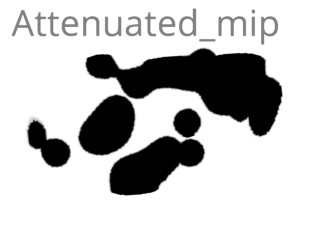

In [271]:
%%capture_png -p attenuated_mip_0.png --celltype Normal --style "width:200px"
layer1.rendering = "attenuated_mip"
layer1.attenuation=0
layer1.gamma = 2
make_screenshot(viewer)

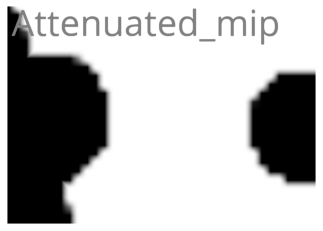

In [272]:
%%capture_png -p Linear.png --celltype Normal --style "width:200px"
layer1.interpolation = "linear"
layer1.attenuation=0
viewer.camera.angles= (90,90,0)
layer1.gamma = 2
viewer.camera.zoom= 20
make_screenshot(viewer)

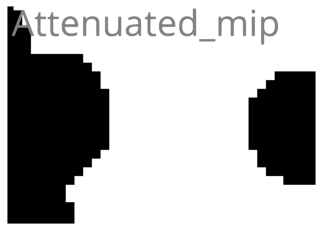

In [273]:
%%capture_png -p Nearest.png --celltype Normal --style "width:200px"
layer1.interpolation = "nearest"
layer1.attenuation=0
viewer.camera.angles= (90,90,0)
layer1.gamma = 2
viewer.camera.zoom= 20
make_screenshot(viewer)

In [276]:
viewer.text_overlay.visible = False

#ChapterManager.clean("Image Options")

gallery_assets/Image_Options_001_Header2.png
gallery_assets/Image_Options_002_FirstView.png
gallery_assets/Image_Options_003_Colormapinferno.png
gallery_assets/Image_Options_004_ColorGreen.png
gallery_assets/Image_Options_005_Colormapinferno.png
gallery_assets/Image_Options_006_Colormapturbocontrast.png
gallery_assets/Image_Options_007_BackToBlackGamma1.png
gallery_assets/Image_Options_008_BackToBlackGamma0_5.png
gallery_assets/Image_Options_009_BackToBlackGamma0_2.png
gallery_assets/Image_Options_010_iso.png
gallery_assets/Image_Options_011_iso2.png
gallery_assets/Image_Options_012_iso2.png
gallery_assets/Image_Options_013_iso2.png
gallery_assets/Image_Options_014_trans.png
gallery_assets/Image_Options_015_additive.png
gallery_assets/Image_Options_016_Minip.png
gallery_assets/Image_Options_017_attenuated_mip_0_5.png
gallery_assets/Image_Options_018_attenuated_mip_0_2.png
gallery_assets/Image_Options_019_attenuated_mip_0.png
gallery_assets/Image_Options_020_Linear.png
gallery_assets/Im